In [1]:
#Libraries to import
using SerialPorts
using PyPlot
using FFTW

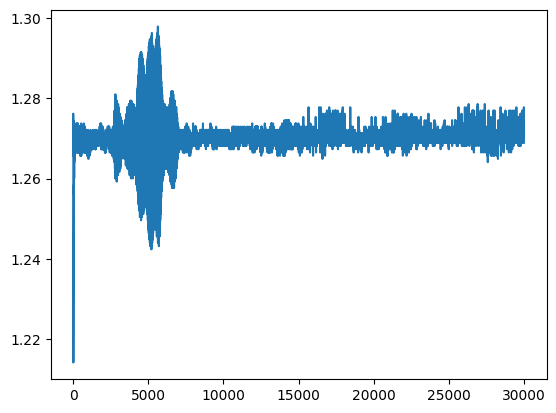

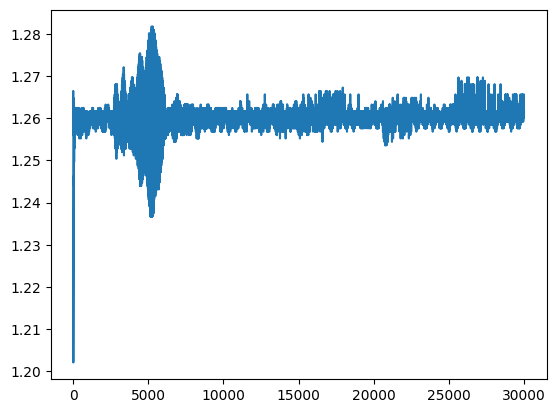

30000
30000


In [13]:
#=================================================================
Creating a matched filter
=================================================================#

list_serialports() # show available ports

array_one = []
array_two = []

ser = SerialPort("/dev/ttyACM0", 9600)

readavailable(ser)
#transmit and receive
write(ser, "c")

while bytesavailable(ser) < 1
    continue
end

sleep(0.05)
readavailable(ser) #removes the conversion complete line

#=================================================================#

b = ""
readavailable(ser)

write(ser, "a") # Print DMA buffer
while bytesavailable(ser) < 1
    continue # wait for a response
end

while true
    if bytesavailable(ser) < 2
        sleep(0.005) # Wait and check again
        if bytesavailable(ser) < 1
            break
        end
    end

    b = string(b, readavailable(ser))

end

array_one=split(b, ("\r\n"))

#=================================================================#

b = "" #clear b
readavailable(ser)

#second buffer
write(ser, "b") # Print DMA buffer
while bytesavailable(ser) < 1
    continue # wait for a response
end

while true
    if bytesavailable(ser) < 2
        sleep(0.005) # Wait and check again
        if bytesavailable(ser) < 1
            break
        end
    end

    b = string(b, readavailable(ser))

end

close(ser)

array_two=split(b, ("\r\n"))

#=================================================================#
ac1 = []
i=1

while (i<length(array_one))
    push!(ac1,parse(Int,(array_one[i])))
    i+=1
end

match_one = (3.3/4096).*ac1

figure()
plot(match_one)

#=================================================================#
ac2 = []
i=1

while (i<length(array_two))
    push!(ac2,parse(Int,(array_two[i])))
    i+=1
end

match_two = (3.3/4096).*ac2

figure()
plot(match_two)

FilterOne = (3.3/4096).*match_one
FilterTwo= (3.3/4096).*match_two

println(length(match_one))
println(length(match_two))

In [14]:
file = open("Filter1.txt", "w")
for n=1:length(array_one)
   write(file,array_one[n],", ");
end
close(file);

file = open("Filter2.txt", "w")
for n=1:length(array_two)
   write(file,array_two[n],", ");
end
close(file);